#### 지난 주
* 사이킷런
  * 로지스틱 회귀 모델을 표현
  * model: SGDClassifier 클래스
  * 훈련: fit
  * 평가: score

* 케라스 (인공신경망)
  * model: Sequential
  * 층 생성 : Dense
  * 훈련: fit
  * 평가: evaluate
  * ANN (인공신경망) ↔ DNN 심층신경망 (두 개 이상의...)  

# 심층 신경망 (DNN)
* 입력층과 출력층 사이에 여러 개의 은닉층으로 이루어진 인공신경망
* 활용 분야
  * 자연어 처리
  * 컴퓨터 비전 등
* 활성화 함수 (선형 함수를 비선형 함수로 변환)
  * why? 신경망의 복잡한 학습을 효율적으로 하기 위함
  * `sigmoid`
  * `softmax`
  * `Relu` 등
  


## 2개의 층

### 데이터 준비

In [36]:
# 텐서플로의 API를 사용해서 패션 MINISt데이터셋 불러오기
import tensorflow as tf

tf.keras.utils.set_random_seed(42) # 랜덤으로 최초 한 번 섞음
tf.config.experimental.enable_op_determinism() # 연산

In [37]:
# 학습할이미지 데이터 값
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [38]:
# 데이터 정보 확인
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [31]:
# 데이터 정규화
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28) # reshape == 2차원으로 변형

# 검증 20% 떼어내기
train_scaled, val_scaled, train_target, val_target = \
train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [9]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


### 층 생성

In [11]:
#시그모이드, 소프트맥스
# 입력층-은닉층-출력층
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784, )) # 입력층:784개의노드, 은닉층:100개의노드
dense2 = keras.layers.Dense(10, activation='softmax') # 출력층: 10개의노드(10개로분별하니까)

# == 층만 나눈 상태 (모델 생성은 Xx )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 심층 신경망 만들기
* 모델 생성

In [12]:
# 얕은 신경망 (은닉층 1개)
model = keras.Sequential([dense1, dense2])

In [13]:
# 유용한 정보 확인
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# 컴파일 (손실함수, 측정기준)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
# 훈련
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7496 - loss: 0.7745
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8463 - loss: 0.4243
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8600 - loss: 0.3842
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8681 - loss: 0.3593
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8745 - loss: 0.3408


In [16]:
# 성능 평가
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8682 - loss: 0.3590


[0.36158475279808044, 0.8663333058357239]

## relu 활성화 함수
* 양수는 그대로 활용하고 음수는 0으로 만듦

In [39]:
# 데이터 재정비
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0

# 검증 20% 떼어내기
train_scaled, val_scaled, train_target, val_target = \
train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [40]:
#Flatten 클래스 이용하여 입력층 추가
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [41]:
#모델 요약
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

처음 층은 전결합층이 아니고 1차원으로 바꿔주는 게 다라서 Param # 값이 출력되지 않음

In [42]:
#모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
# 성능확인
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7620 - loss: 0.6785
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8524 - loss: 0.4056
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8699 - loss: 0.3590
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8790 - loss: 0.3335
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8872 - loss: 0.3148


In [44]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8659 - loss: 0.3893


[0.38888347148895264, 0.8650000095367432]

## 옵티마이저

* ↔ 하이퍼파라미터는 딥러닝 모델을 훈련할 때 우리가 직접 설정해야 하는 변수
  * 학습률, 배치 크기, 에포크 수 등
* 옵티마이저는 모델이 학습하는 과정에서 가중치를 업데이트하는 방법을 결정
  * SGD, Adam, RMSprop 등 (옵티마이저 내부의 하이퍼파라미터)

In [48]:
#SGD(경사 하강법) 옵티마이저
# SGD, 모멘텀, 네스테로프 모멘텀
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9008 - loss: 0.2718


In [49]:
sgd = keras.optimizers.SGD(learning_rate=0.1) #디폴트값 변경
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8961 - loss: 0.2874


In [50]:
# 네스테로프모멘텀 최적화 (최적 값:0.9)
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9015 - loss: 0.2699


In [51]:
# Adagrad와 RMSprop 클래스 객체
adamgrad = keras.optimizers.Adagrad()
model.compile(optimizer=adamgrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9077 - loss: 0.2512


In [52]:
#RMSprop
rms = keras.optimizers.RMSprop()
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8981 - loss: 0.2816


## 손실 곡선
* 훈련 과정을 시각화 (곡선)


In [53]:
# 함수 정의
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [54]:
model = model_fn()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# history
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


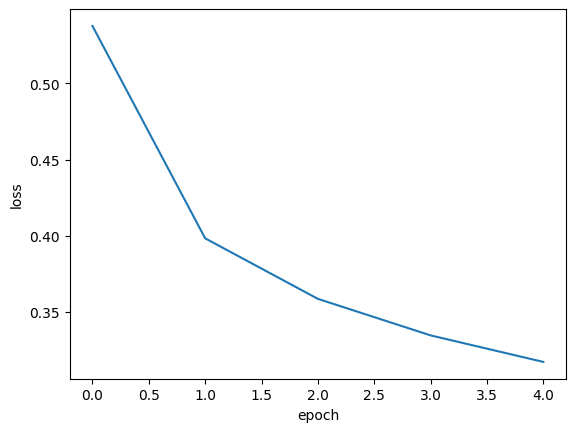

In [57]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss']) # 손실함수 시각화
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

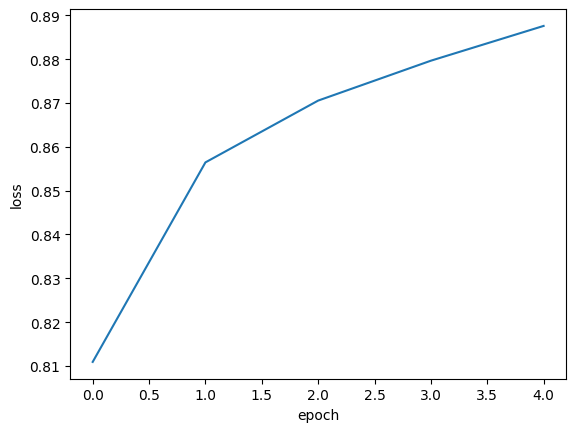

In [58]:
plt.plot(history.history['accuracy']) # 정확도 시각화
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [61]:
# 에포크 (모델 훈련 개수) 20으로 증가시켜 모델 훈련 후 다시 시각화
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

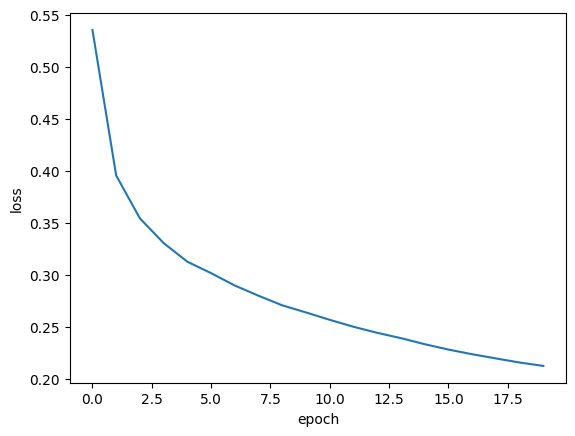

In [62]:
plt.plot(history.history['loss']) # 손실함수 시각화
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()